In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib as mpl

In [2]:
#load the first sheet of aggregationV3
df12=pd.read_csv("../AggregationV4.csv")
df12=df12[:442].copy()

df13=pd.read_csv("../AggregationV4_13CO.csv")
df13=df13[:442].copy()

## remake Fig 10, 13CO 12CO properties vs Rgal 

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

In [64]:
plt.rcParams["text.usetex"]=True
plt.rcParams["axes.labelsize"]=20
plt.rcParams["ytick.labelsize"]=16
plt.rcParams["xtick.labelsize"]=16


### retain only necessary fields 

In [5]:
df12_cut=df12[["CLOUDNUM","RGAL_KPC","FLUX_KKMS_PC2","FLUX_NOEX","SIGV_KMS"]]

In [6]:
df12_cut=df12_cut.rename(columns={"FLUX_KKMS_PC2": "FLUX_KKMS_PC2_12CO",\
                                  "FLUX_NOEX":"FLUX_NOEX_12CO","SIGV_KMS":"SIGV_12CO"})
df12_cut

,CLOUDNUM,RGAL_KPC,FLUX_KKMS_PC2_12CO,FLUX_NOEX_12CO,SIGV_12CO
0,2,2.437271,4017.990011,2940.588034,2.383785
1,3,2.951875,679.957543,289.659221,1.290904
2,4,2.219687,6711.284544,5219.570374,3.138678
3,5,2.474493,15511.107190,13686.789270,2.097412
4,6,2.700979,1197.355086,1197.355086,1.035699
...,...,...,...,...,...
437,439,2.166940,14510.096480,12808.321500,2.861705
438,440,2.990454,1543.572355,1543.572355,0.849755
439,441,1.948576,225.143998,207.432841,0.262894
440,442,2.276506,1430.370898,869.254455,0.766049


In [7]:
df13_cut=df13[["CLOUDNUM","RGAL_KPC","FLUX_KKMS_PC2","FLUX_NOEX","SIGV_KMS"]]

In [8]:
df13_cut=df13_cut.rename(columns={"FLUX_KKMS_PC2": "FLUX_KKMS_PC2_13CO",\
                                  "FLUX_NOEX":"FLUX_NOEX_13CO","SIGV_KMS":"SIGV_13CO"})

### cross-match two datasets

In [9]:
df_both=pd.merge(df13_cut, df12_cut, on='CLOUDNUM', how='inner')
# df_both

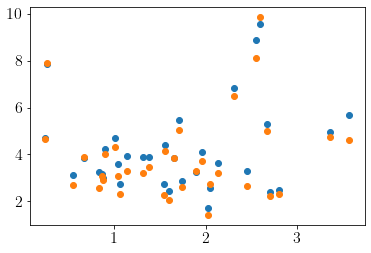

In [10]:
plt.scatter(df_both["RGAL_KPC_x"],df_both["SIGV_12CO"])
plt.scatter(df_both["RGAL_KPC_x"],df_both["SIGV_13CO"])

# plt.xlim(0,4)
# plt.ylim(0,20)

(0.0, 20.0)

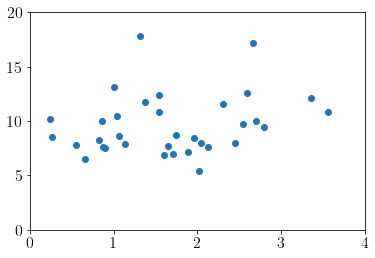

In [11]:
plt.scatter(df_both["RGAL_KPC_x"],df_both["FLUX_KKMS_PC2_12CO"]/df_both["FLUX_KKMS_PC2_13CO"])
plt.xlim(0,4)
plt.ylim(0,20)

In [18]:
x=np.copy(df_both["RGAL_KPC_x"])
y=np.copy(df_both["FLUX_KKMS_PC2_12CO"]/df_both["FLUX_KKMS_PC2_13CO"])

### fit a model: linear relation with Gaussian intrinsic scatter $\sigma$, likelihood function:

$$L(d|m,b,\sigma)=\Pi_i \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{(y_i-mx_i-b)^2}{2\sigma^2}\right]$$

In [61]:
def log_likelihood(theta, x, y):
    m, b, sigma = theta
    model = m * x + b
    sigma2 =  sigma**2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))


Maximum likelihood estimates:
m = 0.749
b = 8.376
sigma = 2.659


Text(0, 0.5, '$\\mathrm{^{12}CO/^{13}CO \\ line \\ ratio}$')

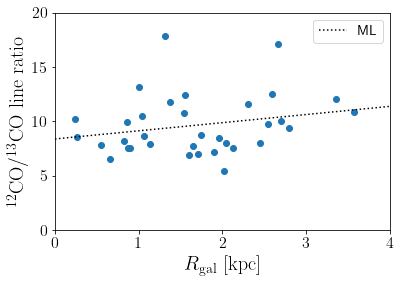

In [74]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0, 10, 2]) + 0.1 * np.random.randn(3)

x=np.copy(df_both["RGAL_KPC_x"])
y=np.copy(df_both["FLUX_KKMS_PC2_12CO"]/df_both["FLUX_KKMS_PC2_13CO"])
yerr=np.zeros_like(y)
soln = minimize(nll, initial, args=(x, y))
m_ml, b_ml, sigma_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("sigma = {0:.3f}".format(sigma_ml))

plt.scatter(x,y)
# plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
# plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
x0=np.linspace(0, 4, 20)

plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0,4)
plt.ylim(0,20)
plt.xlabel("$R_{\mathrm{gal}}~[\mathrm{kpc}]$")
plt.ylabel("$\mathrm{^{12}CO/^{13}CO \ line \ ratio}$")

In [25]:
import emcee

In [43]:
def log_prior(theta):
    m, b, sigma = theta
    if -5.0 < m < 5 and 0.0 < b < 20.0 and 0 < sigma < 20:
        return 0.0
    return -np.inf

In [44]:
def log_probability(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

In [45]:
soln.x

array([0.74877713, 8.37556478, 2.65865164])

In [46]:
pos = soln.x * (1 + 0.1 * np.random.randn(32, 3))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y)
)
sampler.run_mcmc(pos, 50000, progress=True);



100%|███████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:36<00:00, 1379.00it/s]


In [49]:
flat_samples = sampler.get_chain(discard=10000, thin=15, flat=True)
print(flat_samples.shape)

(85312, 3)


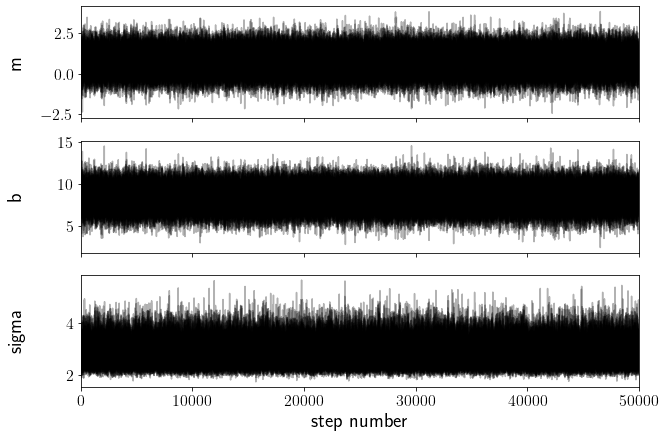

In [52]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

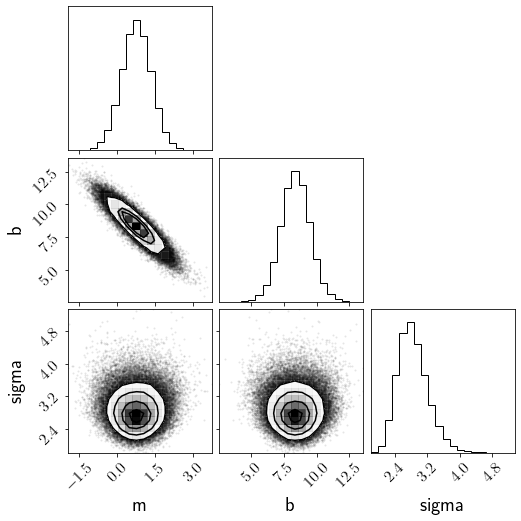

In [53]:
import corner

fig = corner.corner(
    flat_samples, labels=labels,
);

In [104]:
for i in range(3):
    print(np.percentile(flat_samples[:,i],16)-np.percentile(flat_samples[:,i],50),np.percentile(flat_samples[:,i],84)-np.percentile(flat_samples[:,i],50))


-0.5748131336848072 0.5784237687346284
-1.0838348616371798 1.081047531758589
-0.3233888205386939 0.3983802742519149


In [60]:
print(np.percentile(flat_samples[:,0],16),np.percentile(flat_samples[:,0],50), np.percentile(flat_samples[:,0],84))
print(np.percentile(flat_samples[:,1],16),np.percentile(flat_samples[:,1],50), np.percentile(flat_samples[:,1],84))
print(np.percentile(flat_samples[:,2],16),np.percentile(flat_samples[:,2],50), np.percentile(flat_samples[:,2],84))

0.1715811758119779 0.7463943094967852 1.3248180782314136
7.295507846029987 8.379342707667167 9.460390239425756
2.490736986341283 2.814125806879977 3.2125060811318917


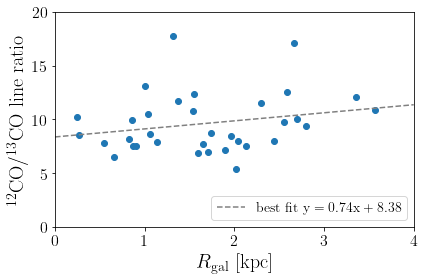

In [109]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), "--", c="grey", label=r"$\rm best\ fit\ y=0.74x+8.38$")
plt.legend(fontsize=14,loc='lower right')
plt.xlim(0,4)
plt.ylim(0,20)
plt.xlabel("$R_{\mathrm{gal}}~[\mathrm{kpc}]$")
plt.ylabel("$\mathrm{^{12}CO/^{13}CO \ line \ ratio}$")
plt.tight_layout()
plt.savefig("fit_lineR_Rgal.pdf")

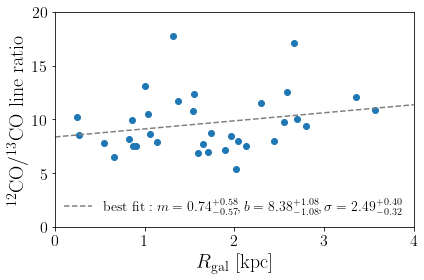

In [110]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), "--", c="grey",\
         label=r"$\mathrm{ best\ fit}: m=0.74^{+0.58}_{-0.57}, b=8.38^{+1.08}_{-1.08}, \sigma=2.49^{+0.40}_{-0.32}$")
# plt.annotate(r"$m=0.74^{+0.58}_{-0.57}$",(0,0))
plt.legend(fontsize=14,loc='lower right',frameon=False)
plt.xlim(0,4)
plt.ylim(0,20)
plt.xlabel("$R_{\mathrm{gal}}~[\mathrm{kpc}]$")
plt.ylabel("$\mathrm{^{12}CO/^{13}CO \ line \ ratio}$")
plt.tight_layout()
plt.savefig("fit_lineR_Rgal_param.pdf")